
# TP CNN - evaluation in limited time (2 hours)
### Diane LINGRAND 

diane.lingrand@univ-cotedazur.fr   
March 2023

**Write your name in this cell:**

In [47]:
# some imports
from IPython.display import Image
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, Flatten, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical


## The Dataset

### Loading the dataset
The dataset considered here is the LFW: Life Faces in the Wild. It is composed of images of celebrities. You can easily download it with the help of the scikit-learn library:

In [48]:
from sklearn.datasets import fetch_lfw_people

In [49]:
lfw_people = fetch_lfw_people(resize=1)
X = lfw_people.images
y = lfw_people.target
names = lfw_people.target_names

Text(0.5, 1.0, 'Donald Rumsfeld')

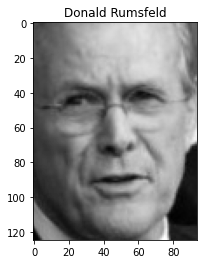

In [50]:
#this small code will display randomly one of the data
import random
index = random.randint(0,len(y)-1)
plt.imshow(X[index], cmap = plt.cm.gray)
plt.title(names[y[index]])

**Question 1:** Write the code that will display the number of data in the dataset and the number of classes in the form: "There are ... data and ... classes"

In [51]:
# your work
import numpy as np
print(f"There are {X.shape[0]} data and {len(np.unique(y))} classes")

There are 13233 data and 5749 classes


**Question 2:** What are the dimensions of a single data and the type of data describing a single pixel (write the code that answers the question)?

In [52]:
# your work
print(X[0].shape, X.dtype)

(125, 94) float32


**Question 3:** Keep the 3 classes with the most data. Denote by X3, y3 and names3 the variables related to this reduced dataset. 

In [66]:
# your work
unique, counts = np.unique(y, return_counts=True)

names3 = np.argsort(counts)[-3:]

indices = np.isin(y, names3)

X3 = X[indices]
y3 = y[indices]

**Question 4:** What are the names of the labels of these 3 classes? How many data in each of these classes? Again, write the code that answers these questions.

In [70]:
# your work
for i in names3:
  print(f'Name: {i}, Count: {np.sum(y == i)}')

Name: 5458, Count: 144
Name: 1047, Count: 236
Name: 1871, Count: 530


**Question 5:** n is the number of data of the class with the least data among the three classes with the most data. For each of the 3 classes, keep the n first data. 

In [81]:
# your work
n = min([np.sum(y == i) for i in names3])

X_new = []
y_new = []

for i in names3:
  new_ind = (y == i)
  X_new.extend(X[new_ind][:n])
  y_new.extend(y[new_ind][:n])

X_new = np.array(X_new)
print(X_new.shape)

X3 = X_new
y3 = y_new

(432, 125, 94)


### train/test splitting
Run the next cell in order to split the dataset into train and test

In [82]:
X3, y3 = shuffle(X3, y3)
Xtrain, Xtest, yTrain, yTest = train_test_split(X3, y3, test_size=0.25, random_state=33)

## Build your own CNN network

<p>Start with a simple CNN: 1 convolutional layer with 32 filters, of dimensions 3 by 3, stride of one, padding 'same' and ReLU activation. Add a max pooling with default parameters except the padding 'same'. Add a Flatten layer and end with a final layer responsible of the classification. </p>
<p>Be careful: the input of a Conv2D layer is of shape (nbData,w,h,channels). If it is not the case of your data, you need to use the reshape function from numpy.</p>

**Question 6:** Write the code that will build such network.

In [ ]:
# your code

**Question 7:** What is the goal of the Flatten layer?

*Answer here to the question 7*

**Question 8:** Plot the summary of the network. 

In [ ]:
# your code

**Question 9:** Explain the number of parameters of the convolution layer.

*Answer here to the question 9*

**Question 10:** Explain the number of parameters of the dense layer.

*Answer here to the question 10*

**Question 11:** What are the dimensions of data after the max pooling?

*Answer here to the question 11*

**Question 12:** Learn this network and plot the history of accuracy on train and validation datasets.

In [ ]:
# your work here

**Question 13:** Evaluate the results using accuracy metric. Compute also F1 measure for each class. Display the confusion matrix

**Question 14:** Are you happy with these results?

*Answer here to the question 14*

**Question 15:** What would be the accuracy of a random classifier (explain how you compute that)?

*Answer here to the question 15*

**Question 16:** In the previous network, replace the Flatten layer by a GlobalAveragePooling. <p>
**16a:** Learn and evaluate this new network. </p><p>
**16b:** Are you satisfied with the results? </p><p>
**16c:** **Explain in details** the results.</p>

In [ ]:
# for this question, you will have to write some code here and your comments. 
# You can add different cells (code or markdown) in order to organise your answers.

**Question 17:** Try different variations of the first CNN by adding filters, layers, strides ... in order to improve the learning.

In [ ]:
# your work